In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [12]:
sys.path.append("..")
from model.uplift_model import *
from model.roi_model import *

In [13]:
import matplotlib.pyplot as plt

def plot_loss(history, *losses):
    for loss in losses:
        plt.plot(history.history[loss], label=loss)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    

In [37]:
count = 20

trainable_weights
p1_hidden_1/kernel:0
p1_hidden_1/bias:0
p1_hidden_2/kernel:0
p1_hidden_2/bias:0
p1/kernel:0
p1/bias:0
non_trainable_weights
Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
p0_raw_features (InputLayer)    [(None, 76)]         0                                            
__________________________________________________________________________________________________
treated_input (InputLayer)      [(None, 1)]          0                                            
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 77)           0           p0_raw_features[0][0]            
                                                                 treated_input[0][0]              
________________________________________________

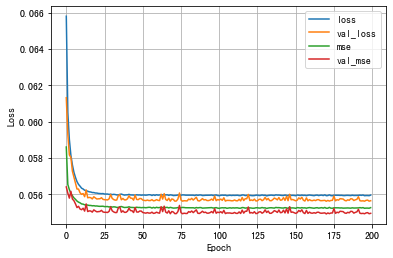

iteration =  2


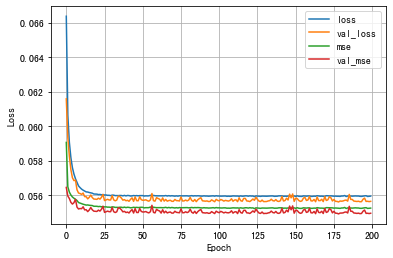

iteration =  3


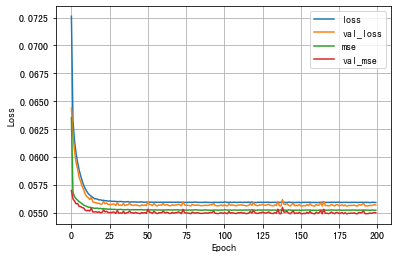

iteration =  4


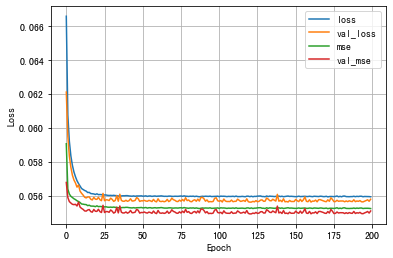

iteration =  5


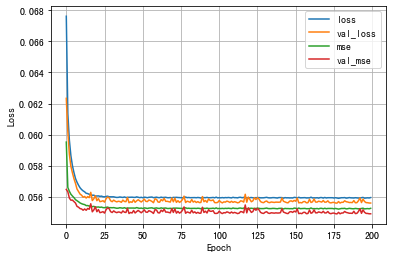

iteration =  6


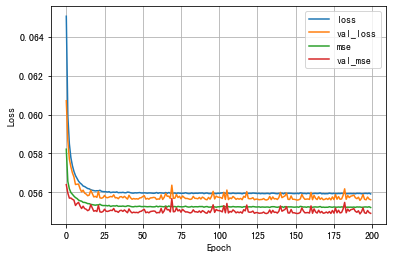

iteration =  7


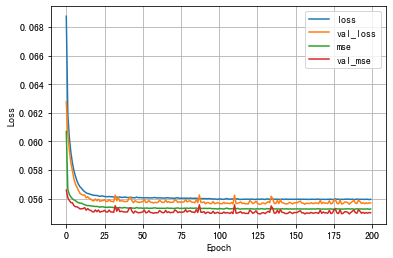

iteration =  8


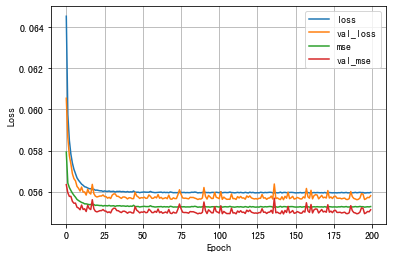

iteration =  9


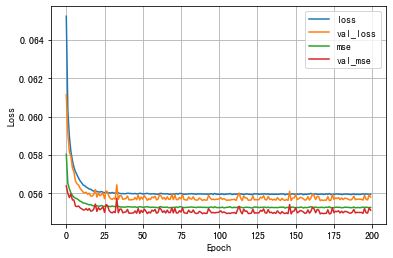

iteration =  10


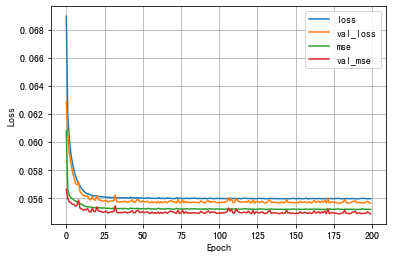

iteration =  11


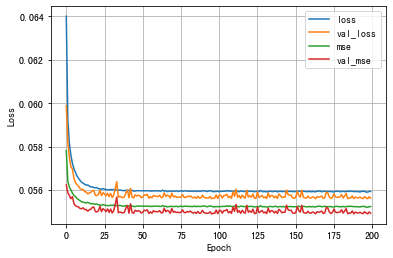

iteration =  12


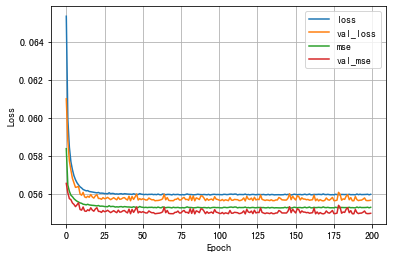

iteration =  13


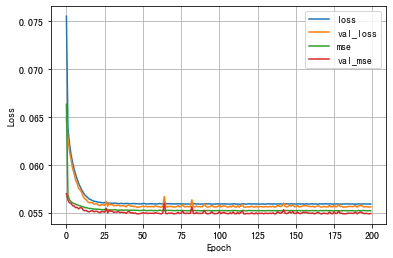

iteration =  14


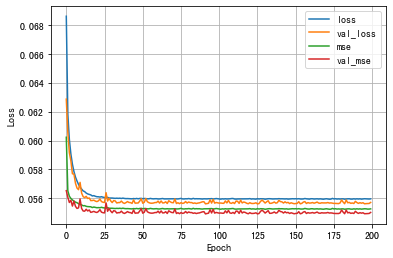

iteration =  15


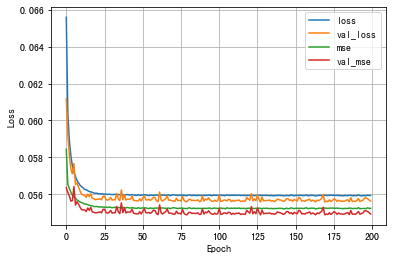

iteration =  16


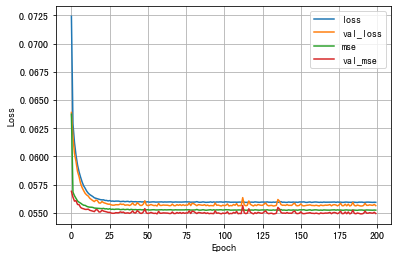

iteration =  17


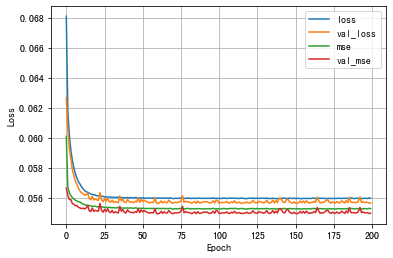

iteration =  18


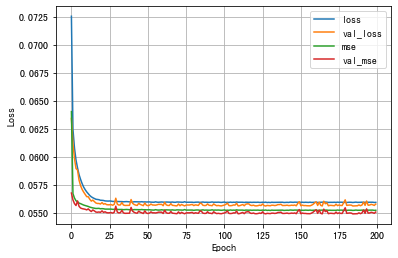

iteration =  19


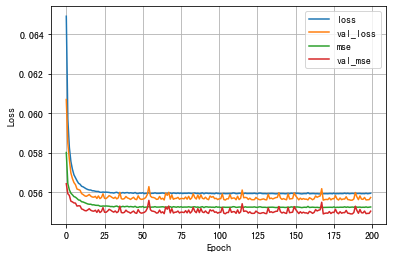

iteration =  20


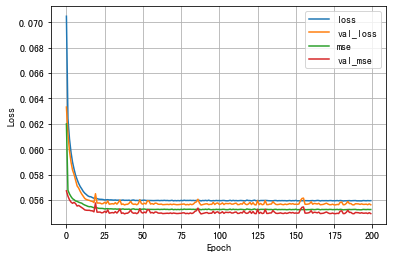

In [38]:
# S-Learner
# 1e-4
import keras
import keras.backend as K
import tensorflow as tf
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from model.uplift_model import *

final_model = get_slearner_model()
final_model.compile(loss='mse', optimizer='adam', metrics=['mse'])
#lambda y_true,y_pred: y_pred
print('trainable_weights')
for x in final_model.trainable_weights:
    print(x.name)
print('non_trainable_weights')
for x in final_model.non_trainable_weights:
    print(x.name)
final_model.summary()


for i in range(count):

    print("iteration = ", i + 1)
    
    final_model = get_slearner_model()
    final_model.compile(loss='mse', optimizer='adam', metrics=['mse'])

    mcp_save = ModelCheckpoint('../model_file/roi/marketing/final_model/direct_ratio_SL/slearner_marketing_cost_model_{}.h5'.format(i+1), save_best_only=True, monitor='val_loss', mode='min', save_weights_only=True)
    history = final_model.fit([X, T], Yc, validation_split=0.2, epochs=200, batch_size=4096, shuffle=True, verbose=0, callbacks=[mcp_save])

        
    plot_loss(history, "loss", "val_loss", "mse", "val_mse")
    
    

trainable_weights
p1_hidden_1/kernel:0
p1_hidden_1/bias:0
p1/kernel:0
p1/bias:0
non_trainable_weights
Model: "model_33"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
p0_raw_features (InputLayer)    [(None, 76)]         0                                            
__________________________________________________________________________________________________
p1_hidden_1 (Dense)             (None, 64)           4928        p0_raw_features[0][0]            
__________________________________________________________________________________________________
treated_input (InputLayer)      [(None, 1)]          0                                            
__________________________________________________________________________________________________
reward_input (InputLayer)       [(None, 1)]          0                                  

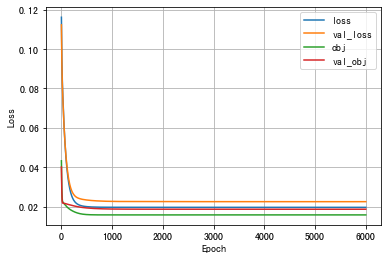

iteration =  2


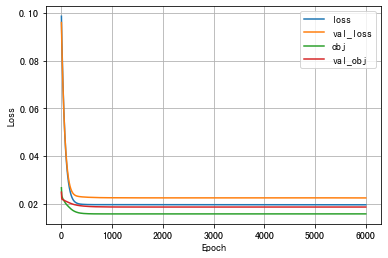

iteration =  3


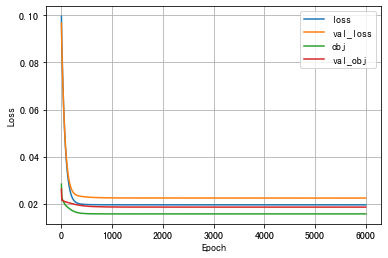

iteration =  4


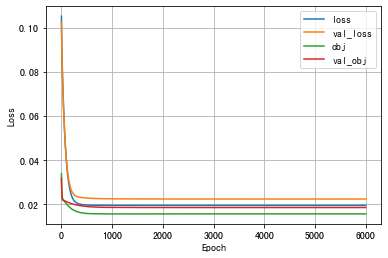

iteration =  5


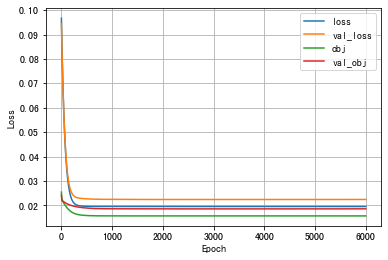

iteration =  6


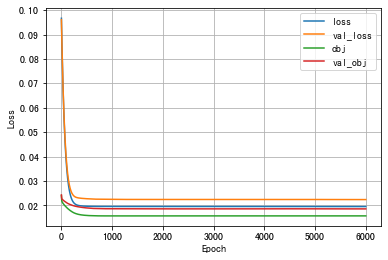

iteration =  7


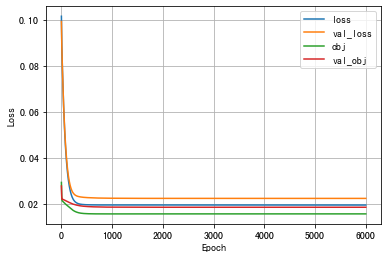

iteration =  8


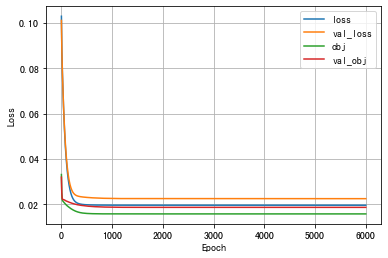

iteration =  9


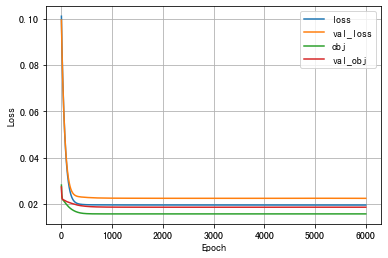

iteration =  10


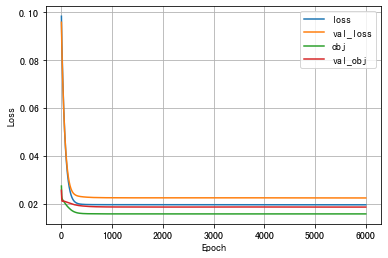

iteration =  11


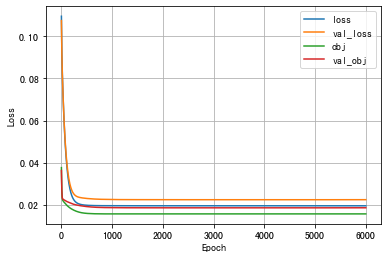

iteration =  12


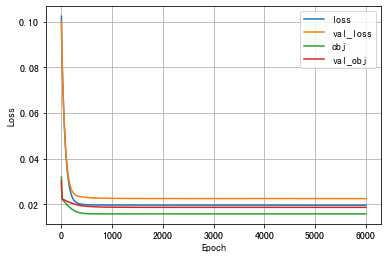

iteration =  13


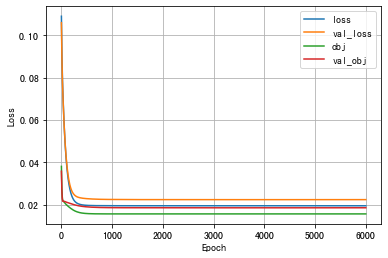

iteration =  14


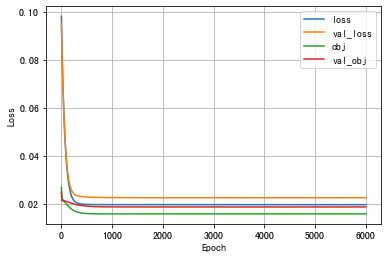

iteration =  15


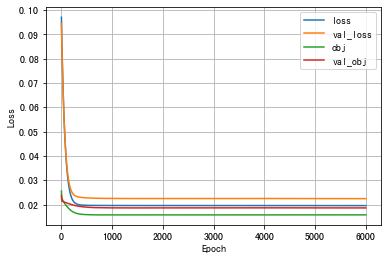

iteration =  16


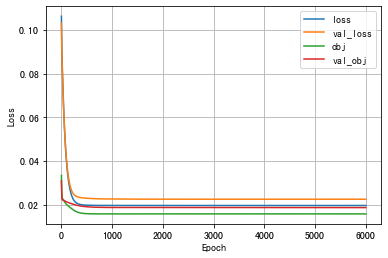

iteration =  17


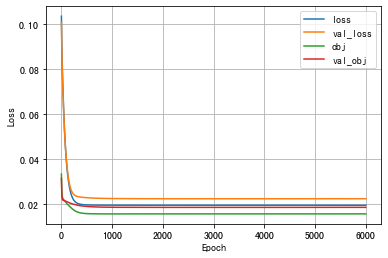

iteration =  18


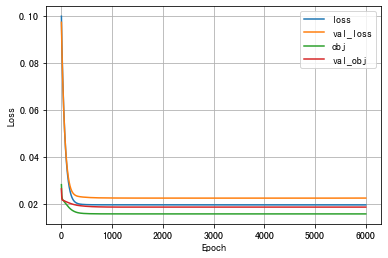

iteration =  19


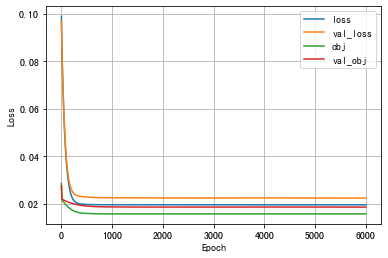

iteration =  20


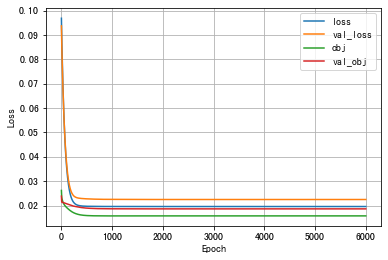

In [39]:
# ROI RANK MODEL
# 1e-3
import keras
import keras.backend as K
import tensorflow as tf
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from model.roi_model import *

final_model = get_roi_rank_model()
final_model.compile(loss=None, optimizer='adam')
#lambda y_true,y_pred: y_pred
print('trainable_weights')
for x in final_model.trainable_weights:
    print(x.name)
print('non_trainable_weights')
for x in final_model.non_trainable_weights:
    print(x.name)
final_model.summary()

for i in range(count):

    print("iteration = ", i + 1)
    
    final_model = get_roi_rank_model()
    final_model.compile(loss=None, optimizer='adam')

    mcp_save = ModelCheckpoint('../model_file/roi/marketing/final_model/roi_rank/roi_rank_marketing_model_{}.h5'.format(i+1), save_best_only=False, monitor='val_loss', mode='min', save_weights_only=True)
    history = final_model.fit([X, T, Yr, Yc], validation_split=0.2, epochs=6000, batch_size=4096000, shuffle=True, verbose=0, callbacks=[mcp_save])

    plot_loss(history, "loss", "val_loss", "obj", "val_obj")
